# Intialize

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

# 'k_pivot': 0.05,
# 'N_ncdm': 1,
# 'N_ur': 2.0328,
# 'm_ncdm': 0.06    

}



font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# # a simple conversion from cl's to dl's
# def l_to_dl(lp):
#     return lp*(lp+1.)/2./np.pi

2024-02-14 14:35:06.236671: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-14 14:35:06.236696: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-14 14:35:06.236702: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-14 14:35:06.236737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-14 14:35:06.236761: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Compute hmf

In [12]:
%%time 
M = Class()
M.set(cosmo_params)
params = {
        'output': 'dndlnM',
        # mass function
        'mass function' : 'T08',
        #integration precision settings
        'ndim_redshifts' :80,
        #redshift and mass bounds
        'z_min' : 0.,
        'z_max' : 3.,
        'M_min' : 1e10,
        'M_max' : 1e15,
    
        'skip_cmb':1,
        'skip_pknl':1
}
M.set(params)
M.compute_class_szfast()

CPU times: user 196 ms, sys: 74.2 ms, total: 270 ms
Wall time: 191 ms


In [13]:
z = 0.
print(M.pk_lin(1.,z))
z = 1.
print(M.pk_lin(1.,z))

86.81763360030749
32.18256626141982


In [14]:
m_arr = np.geomspace(params['M_min'],params['M_max'],500)
dndlnm = np.vectorize(M.get_dndlnM_at_z_and_M)
sigma = np.vectorize(M.get_sigma_at_z_and_m)
nu = np.vectorize(M.get_nu_at_z_and_m)
b1 = np.vectorize(M.get_first_order_bias_at_z_and_nu)
b2 = np.vectorize(M.get_second_order_bias_at_z_and_nu)

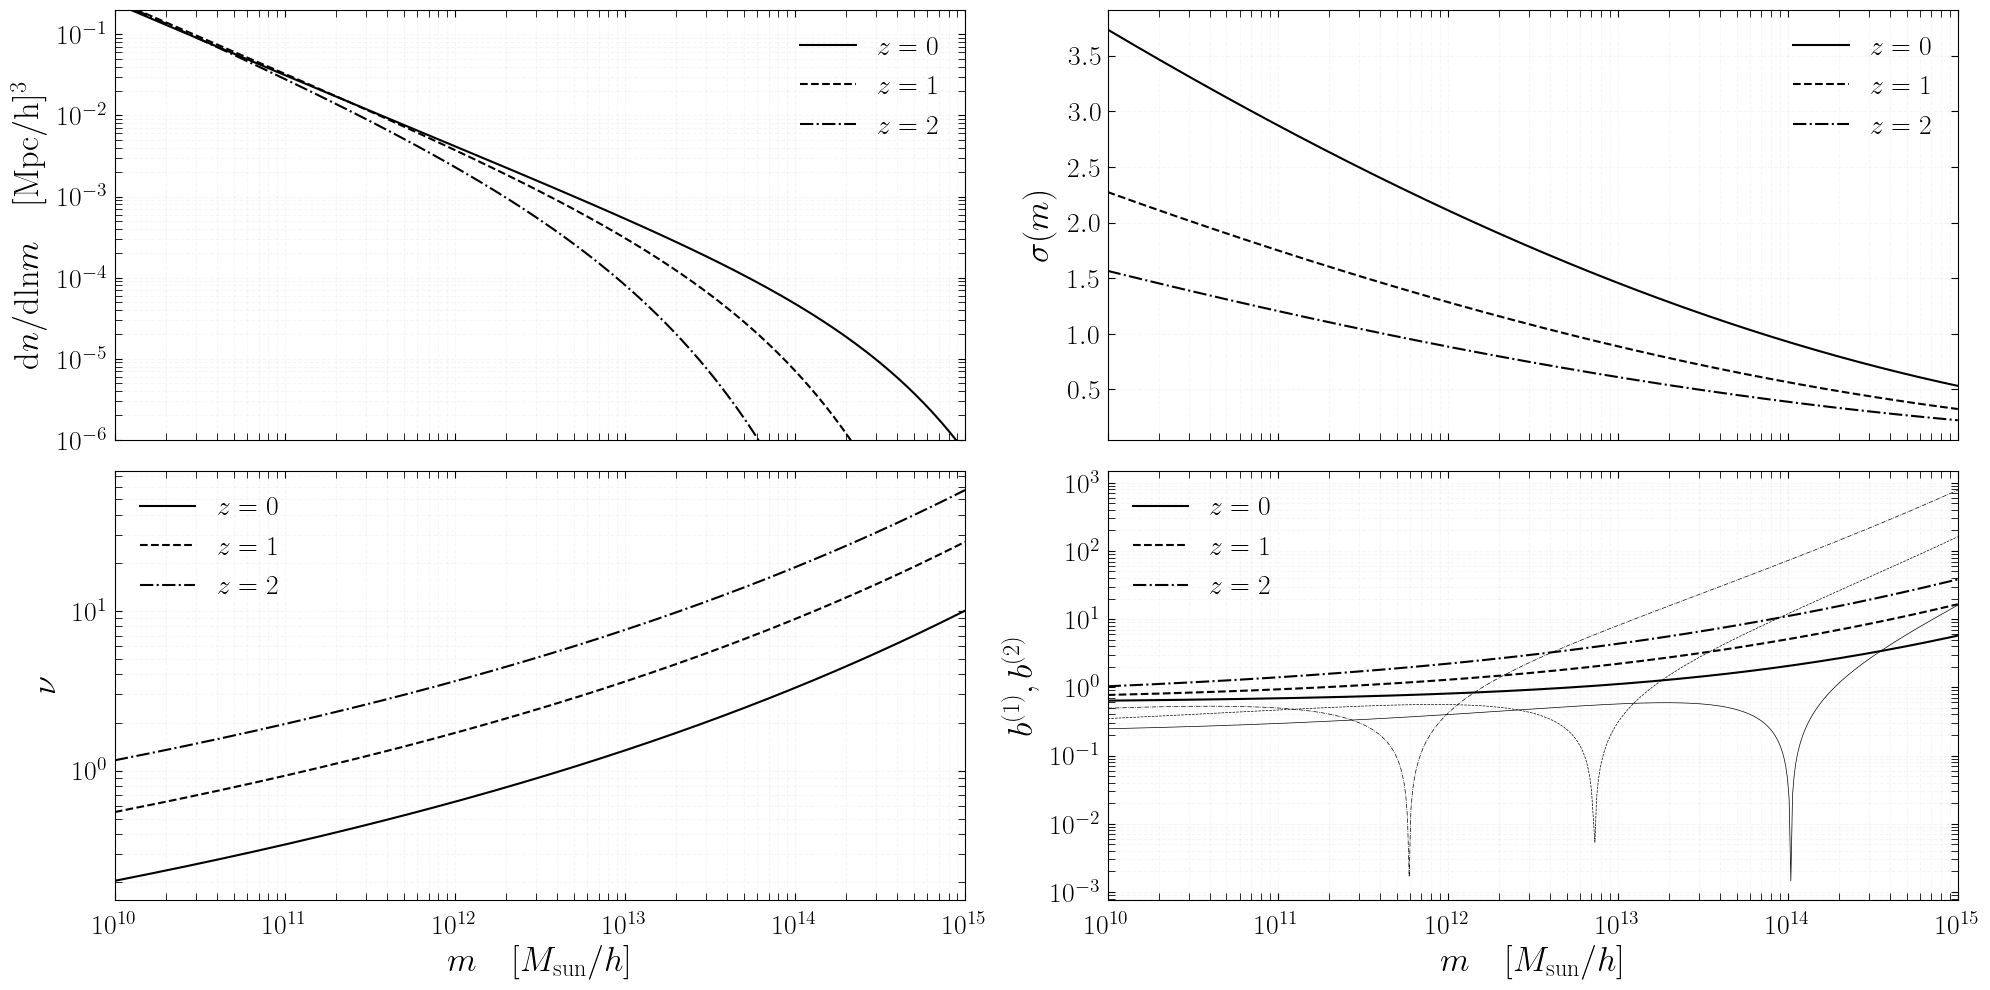

In [15]:

label_size = 20
title_size = 25
legend_size = 13
handle_length = 1.5
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10),sharex=True)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

# ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\mathrm{d}n/\mathrm{dln} m\quad[\mathrm{Mpc/h}]^3$',size=title_size,labelpad=8)

z = 0.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')

ax.loglog()

ax.set_ylim(1e-6,2e-1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=1,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=0$')

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

# ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\sigma(m)$',size=title_size,labelpad=8)

z = 0.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')


ax.set_xscale('log')
# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=1,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=1$')

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\nu$',size=title_size,labelpad=8)


z = 0.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')

ax.loglog()

# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=2,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=2$')

ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$b^{(1)}, b^{(2)}$',size=title_size,labelpad=8)


z = 0.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',lw=0.5)
z = 1.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',ls='--',lw=0.5)
z = 2.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',ls='-.',lw=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])
ax.legend(loc=2,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=2$')




fig.tight_layout()
plt.savefig('figures/hmf.pdf')

# Compare T08 and T10

In [16]:
%%time 
MT10 = Class()
MT10.set(cosmo_params)
params = {
        'output': 'dndlnM',
        # mass function
        'mass function' : 'T10',
        #integration precision settings
        'ndim_redshifts' :80,
        #redshift and mass bounds
        'z_min' : 0.,
        'z_max' : 3.,
        'M_min' : 1e10,
        'M_max' : 1e15,
    
        'skip_cmb':1,
        'skip_pknl':1
}
MT10.set(params)
MT10.compute_class_szfast()

CPU times: user 205 ms, sys: 77.1 ms, total: 282 ms
Wall time: 202 ms


In [17]:
z = 0.
print(MT10.pk_lin(1.,z))
z = 1.
print(MT10.pk_lin(1.,z))

86.81763360030749
32.18256626141982


In [18]:
m_arr = np.geomspace(params['M_min'],params['M_max'],500)
dndlnmT10 = np.vectorize(MT10.get_dndlnM_at_z_and_M)
sigmaT10 = np.vectorize(MT10.get_sigma_at_z_and_m)
nuT10 = np.vectorize(MT10.get_nu_at_z_and_m)
b1T10 = np.vectorize(MT10.get_first_order_bias_at_z_and_nu)
b2T10 = np.vectorize(MT10.get_second_order_bias_at_z_and_nu)

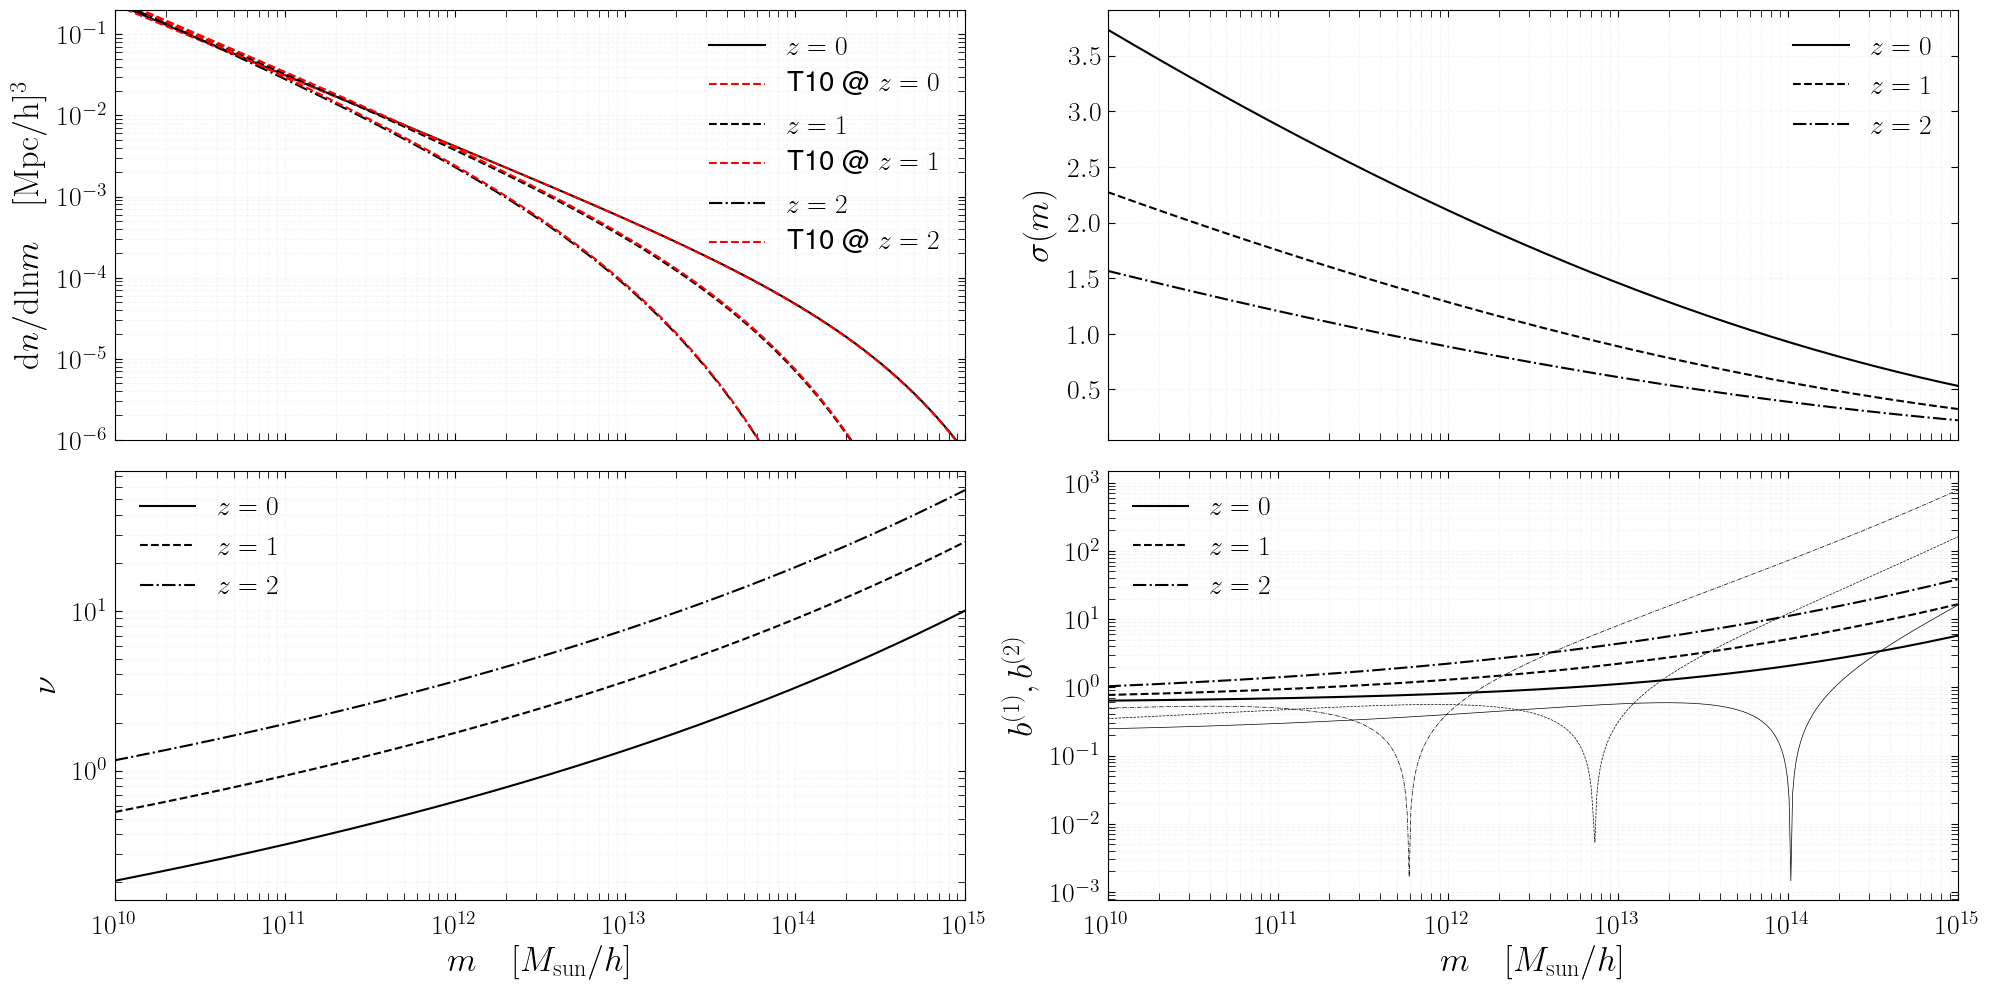

In [22]:

label_size = 20
title_size = 25
legend_size = 13
handle_length = 1.5
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10),sharex=True)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

# ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\mathrm{d}n/\mathrm{dln} m\quad[\mathrm{Mpc/h}]^3$',size=title_size,labelpad=8)

z = 0.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
ax.plot(m_arr,dndlnmT10(z,m_arr),label=r'T10 @ $z=%.0f$'%z,alpha=1.,c='r',ls='--')
z = 1.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
ax.plot(m_arr,dndlnmT10(z,m_arr),label=r'T10 @ $z=%.0f$'%z,alpha=1.,c='r',ls='--')
z = 2.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')
ax.plot(m_arr,dndlnmT10(z,m_arr),label=r'T10 @ $z=%.0f$'%z,alpha=1.,c='r',ls='--')

ax.loglog()

ax.set_ylim(1e-6,2e-1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=1,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=0$')

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

# ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\sigma(m)$',size=title_size,labelpad=8)

z = 0.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')


ax.set_xscale('log')
# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=1,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=1$')

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\nu$',size=title_size,labelpad=8)


z = 0.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')

ax.loglog()

# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=2,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=2$')

ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$b^{(1)}, b^{(2)}$',size=title_size,labelpad=8)


z = 0.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',lw=0.5)
z = 1.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',ls='--',lw=0.5)
z = 2.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',ls='-.',lw=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])
ax.legend(loc=2,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=2$')




fig.tight_layout()
plt.savefig('figures/hmf.pdf')